In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
data = pd.read_csv("advertising.csv")
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
#pinting the shape of dataframe
data.shape

(200, 4)

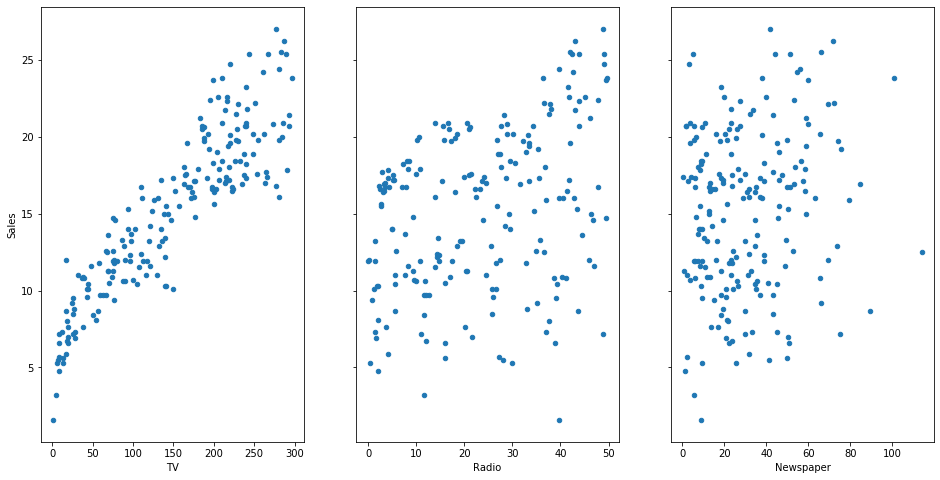

In [4]:
#visualizing the elationship between the feature and the response using the scatterplot
fig, axs = plt.subplots(1, 3, sharey=True)
data.plot(kind='scatter', x='TV', y='Sales', ax=axs[0], figsize=(16, 8))
data.plot(kind='scatter', x='Radio', y='Sales', ax=axs[1])
data.plot(kind='scatter', x='Newspaper', y='Sales', ax=axs[2])

In [5]:
# create X and y
feature_cols = ['TV']
X = data[feature_cols]
y = data.Sales

# follow the usual sklearn pattern: import, instantiate, fit
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X, y)

# print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

6.9748214882298925
[0.05546477]


In [6]:
#calculation
6.9748+0.0554*100

12.514800000000001

In [7]:
# you have to create a DataFrame since the Statsmodels formula interface expects it
X_new = pd.DataFrame({'TV': [200]})
X_new.head()

,TV
0,200


In [8]:
# use the model to make predictions on a new value
lm.predict(X_new)

array([18.06777558])

In [9]:
# create a DataFrame with the minimum and maximum values of TV
X_new = pd.DataFrame({'TV': [data.TV.min(), data.TV.max()]})
X_new.head()

,TV
0,0.7
1,296.4


In [10]:
#  predictions for  x values 
preds = lm.predict(X_new)
preds

array([ 7.01364683, 23.41457946])

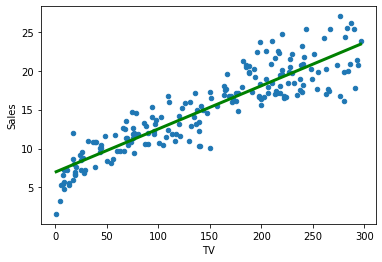

In [11]:
# first, plotting observed data
data.plot(kind='scatter', x='TV', y='Sales')

# then, plotting least squares line
plt.plot(X_new, preds, c='green', linewidth=3)

In [12]:
import statsmodels.formula.api as smf
lm = smf.ols(formula='Sales ~ TV', data=data).fit()
lm.conf_int()

,0,1
Intercept,6.338740,7.610903
TV,0.051727,0.059203


In [13]:
#p-values for model coefficient
lm.pvalues

Intercept    5.027719e-54
TV           7.927912e-74
dtype: float64

In [14]:
#R-squared values for model
lm.rsquared

0.8121757029987414

In [15]:
#creating  X and y
feature_cols = ['TV', 'Radio', 'Newspaper']
X = data[feature_cols]
y = data.Sales

lm = LinearRegression()
lm.fit(X, y)

# print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

4.625124078808655
[0.05444578 0.10700123 0.00033566]


In [16]:
lm = smf.ols(formula='Sales ~ TV + Radio + Newspaper', data=data).fit()
lm.conf_int()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     605.4
Date:                Thu, 16 Jul 2020   Prob (F-statistic):           8.13e-99
Time:                        12:23:51   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             774.7
Df Residuals:                     196   BIC:                             787.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.6251      0.308     15.041      0.000       4.019       5.232
TV             0.0544      0.001     39.592      0.000       0.052       0.057
Radio          0.1070      0.008     12.604      0.000       0.090       0.124
Newspaper      0.0003      0.006      0.058      0.954      -0.011       0.012
==============================================================================
Omnibus:                       16.081   Durbin-Watson:                   2.251
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.655
Skew:                          -0.431   Prob(JB):                     9.88e-07
Kurtosis:                       4.605   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
#ncluding TV and Radio in the model
lm = smf.ols(formula='Sales ~ TV + Radio', data=data).fit()
lm.rsquared

0.9025896186081139

In [18]:
#including Tv,Radio and Newspaper in the model
lm = smf.ols(formula='Sales ~ TV + Radio + Newspaper', data=data).fit()
lm.rsquared

0.9025912899684558

In [19]:
#includin only TV
lm= smf.ols(formula='Sales ~ TV',data=data).fit()
lm.rsquared

0.8121757029987414

In [20]:
#including only Radio
lm = smf.ols(formula='Sales ~ Radio',data=data).fit()
lm.rsquared

0.1222419039947863

In [21]:
#including only Newspaper
lm = smf.ols(formula='Sales ~ Newspaper',data=data).fit()
lm.rsquared

0.024951369862865058